# K-means Clustering

>Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). 

In the K-means algorithm, the similarity is defined by the Euclidean distance between features. Our goal is to find the centers of the clusters and to assign the data points to one of these clusters. The distance of data point to the center of its cluster shall be smaller compared with the distance to the center of the other clusters.

Hence, the mathematical descreption is as follows.

$$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|\mathbf{x}_n - \mathbf{\mu}_k\|^2 \tag{9.1}$$

where
- $\{\mathbf{x}_1, \cdots, \mathbf{x}_N\}$ is the dataset for clustering.
- $K$ is the number of clusters, a hyperparameter.
- $r_{nk}$ is the element of $r_n = [r_{n1},\cdots,r_{nK}]$ which is using to represent the assignment of the data point $\mathbf{x}_n$. One data point can only be assigned to one of the clusters. The element of the assigned cluster is set to be $1$, whereas the remaining elements are set to be zero.
- $\mathbf{\mu}_k$ is the center of the cluster $k$.

Then our goal is to minimize the objective function $J$ by choosing proper values of $r_{nk}$ and $\mathbf{\mu}_k$.

$$\mathbf{\mu}^{\star},r^{\star} = \underset{\mathbf{\mu}, r}{argmin} J$$

We can do this through an iterative procedure in which each iteration involves two successive steps corresponding to successive optimizations with respect to the $r_{nk}$ and the $\mathbf{\mu}_k$.

1. **Initialization**. Choose some initail values for the $\mathbf{\mu}_k$.
2. **Expectation**. Minimize $J$ with respect to the $r_{nk}$, keeping the $\mathbf{\mu}_k$ fixed. Looking back to the form of the objective function, we can obtain the temporary minimum by assigning the data point to the closest cluster center.
$$\bbox[#e0f0ff]{r_{nk} = \left\{
\begin{array}{ll}
1 & \text{if }k=argmin_{j}\|\mathbf{x}_n - \mathbf{\mu}_j\|^2\\
0 & \text{otherwise}
\end{array}
\right.} \tag{9.2}$$
3. **Maximization**. Minimize $J$ with respect to the $\mathbf{\mu}_k$, keeping $r_{nk}$ fixed. For the reason that $\mathbf{\mu}_k$ is a continuous variable, we can minimize $J$ by setting its derivative with respect $\mathbf{\mu}_k$ to zero giving
$$2\sum_{n=1}^N r_{nk}(\mathbf{x}_n - \mathbf{\mu}_k) = 0 \tag{9.3}$$
which we can easily solve for $\mathbf{\mu}_k$ to give
$$\bbox[#e0f0ff]{\mu_{k} = \frac{\sum_n r_{nk}\mathbf{x}_n}{\sum_{n} r_{nk}}} \tag{9.4}$$
where we set $\mathbf{\mu}_k$ equal to the mean of all of the data point $\mathbf{x}_n$ assigned to cluster $k$. *For this reason, the procedure is known as the K-means algorithm*.
4. The Expectation and Maximization stages are then repeated until convergence.

*Because each phase reduces the value of the objective function $J$, convergence of the algorithm is assured. However, it may converge to a local rather than global minimum of $J$*.

Hand-made centers:
[[ 1.90399356  1.15929609]
 [-1.89481591  1.03300665]
 [ 1.11545282 -0.9386645 ]
 [-0.93805495 -1.21628065]]

sklearn centers:
[[ 1.11545282 -0.9386645 ]
 [-1.89481591  1.03300665]
 [ 1.90399356  1.15929609]
 [-0.93805495 -1.21628065]]



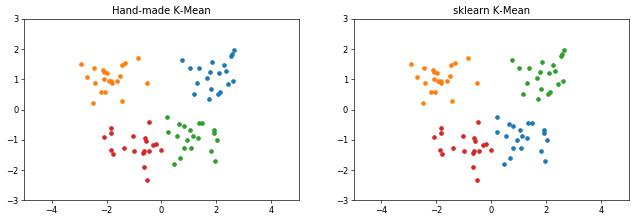

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging
import sys
from sklearn.cluster import KMeans

# convert warnings to error
warnings.filterwarnings("error")

def getLogger(name):
    logger = logging.getLogger(name)
    if len(logger.handlers) == 0:
        handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter('%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(logging.INFO)
    return logger

logger = getLogger("Kmean")

Color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
M1 = np.array([-1, -1])
M2 = np.array([2, 1])
M3 = np.array([1, -1])
M4 = np.array([-2, 1])
S = .3*np.identity(2)

def gen_data(n):
    n = 2*n
    x1 = np.random.multivariate_normal(M1, S, size=n)
    x2 = np.random.multivariate_normal(M2, S, size=n)
    x3 = np.random.multivariate_normal(M3, S, size=n)
    x4 = np.random.multivariate_normal(M4, S, size=n)
    X = np.vstack((x1, x2, x3, x4))
    return X

def draw_points(ax, X, Y):
    for i in range(len(Y)):
        ax.scatter(X[i][0], X[i][1], s=20, color=Color[Y[i]])
    return

def KMean(X, K):
    # initialize
    length = len(X)
    shape = tuple(np.insert(X[0].shape, 0, K))
    Mean = np.zeros(shape)
    Y = None
    finished = 0
    
    while True:
        if finished == 1:
            break
        
        numbers = np.zeros(K)
        Mean_sum = np.zeros(shape)
        last_mean = np.copy(Mean)
        distance = np.zeros((K, length))
        # Expectation
        for k in range(K):
            error = X - Mean[k]
            for j in range(X.shape[1]):
                distance[k] += error[:,j]**2
        Y = np.argmin(distance, axis=0)
        
        # Maximization
        for i in range(length):
            Mean_sum[Y[i]] += X[i]
            numbers[Y[i]] += 1
        for k in range(K):
            if numbers[k] != 0:
                Mean[k] = Mean_sum[k]/numbers[k]
        
        if np.array_equal(Mean, last_mean):
            finished = 1
    return Y, Mean

def sklearn_KMeans(ax, X, k):
    kmeans = KMeans(n_clusters = k)
    Y = kmeans.fit_predict(X)
    logger.info('sklearn centers:\n{}\n'.format(kmeans.cluster_centers_))
    for i in range(len(Y)):
        ax.scatter(X[i][0], X[i][1], s=20, color=Color[Y[i]])
    return

def main():
    fig = plt.figure(figsize=(13,4), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    X = gen_data(10)

    xmin = -5
    xmax = 5
    ymin = -3
    ymax = 3
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(ymin, ymax)
    ax1.set_title("Hand-made K-Mean")
    ax2.set_title("sklearn K-Mean")

    K = 4
    Y, M= KMean(X, K)
    logger.info('Hand-made centers:\n{}\n'.format(M))
    draw_points(ax1, X, Y)
    
    sklearn_KMeans(ax2, X, K)
    
    plt.show()
    
if __name__=="__main__":
    main()

There are also methods called stochastic K-means (1 data point per update) and mini-batch K-means (3 or 4 data points per update) that can accelate the clustering speed.


# Image segmentation

The goal of segmentation is to partition an image into regions each of which has reasonable homogeneous visual appearance or which correspons to objects or parts of objects. Here, we use K-means to solve a simplified segmentation problem that only takes the color of pixels as input features. It should be emphasized that this use of K-means is not a particularly sophisticated approach to image segmentation, not least because it takes no account of the spatial proximity of different pixels.

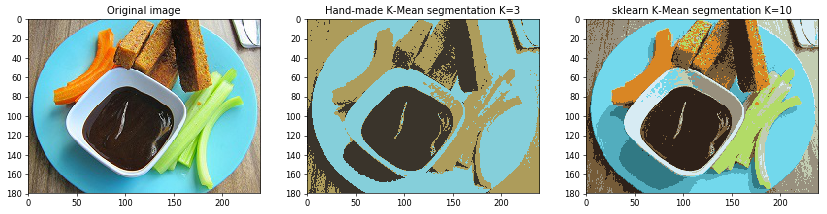

In [4]:
import matplotlib.image as mpimg

def draw_image(ax, M, Y, ishape):
    length = len(Y)
    image = np.zeros((length, 3)).astype(int)
    for i in range(length):
        image[i][0] = M[Y[i]][0]
        image[i][1] = M[Y[i]][1]
        image[i][2] = M[Y[i]][2]
    image = image.reshape(ishape)
    ax.imshow(image)

def main():
    fig = plt.figure(figsize=(17,5), dpi=60)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    
    ax1.set_title("Original image")
    ax2.set_title("Hand-made K-Mean segmentation K=3")
    ax3.set_title("sklearn K-Mean segmentation K=10")
    
    image = mpimg.imread("breakfast.jpg")
    ishape = image.shape
    X = image.reshape((-1, 3))
    ax1.imshow(image)

    K = 3
    Y, M= KMean(X, K)
    M = M.astype(int)
    draw_image(ax2, M, Y, ishape)
    
    K = 10
    kmeans = KMeans(n_clusters = K)
    Y = kmeans.fit_predict(X)
    M = kmeans.cluster_centers_.astype(int)
    draw_image(ax3, M, Y, ishape)

    plt.show()
    
if __name__=="__main__":
    main()